## Data Visualization

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
data = pd.read_csv(r"C:\Users\sukhd\OneDrive\Desktop\Summer Training\Cleaned Flight_Data.csv")

In [3]:
# Creating backup
df = data.copy()

### Busiest Route

In [4]:
plot_data = df.groupby('route')['route'].count().reset_index(name = 'count')
plot_data

,route,count
0,Bangalore-Chennai,12903
1,Bangalore-Delhi,27768
2,Bangalore-Hyderabad,16782
3,Bangalore-Kolkata,19852
4,Bangalore-Mumbai,25824
5,Chennai-Delhi,20563
6,Chennai-Hyderabad,12498
7,Chennai-Kolkata,13636
8,Chennai-Mumbai,19468
9,Delhi-Hyderabad,17834


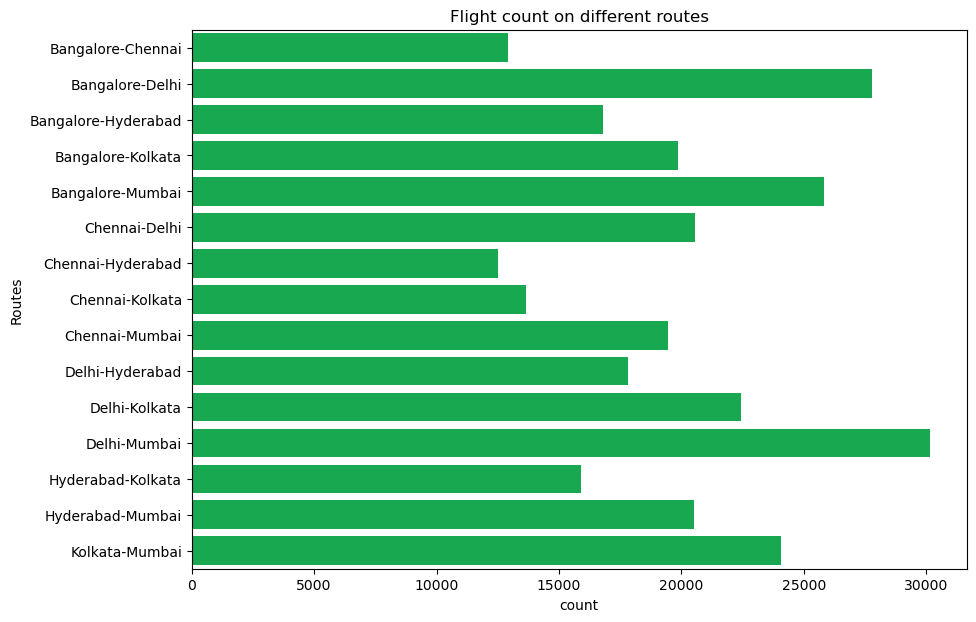

In [5]:
fig, ax = plt.subplots(1,1, figsize = (10,7))
sns.barplot(x = plot_data['count'], y = plot_data['route'], color = '#00c04b', ax = ax)
plt.title(f"Flight count on different routes")
plt.ylabel("Routes")
plt.show()

### Price variation over different parameters

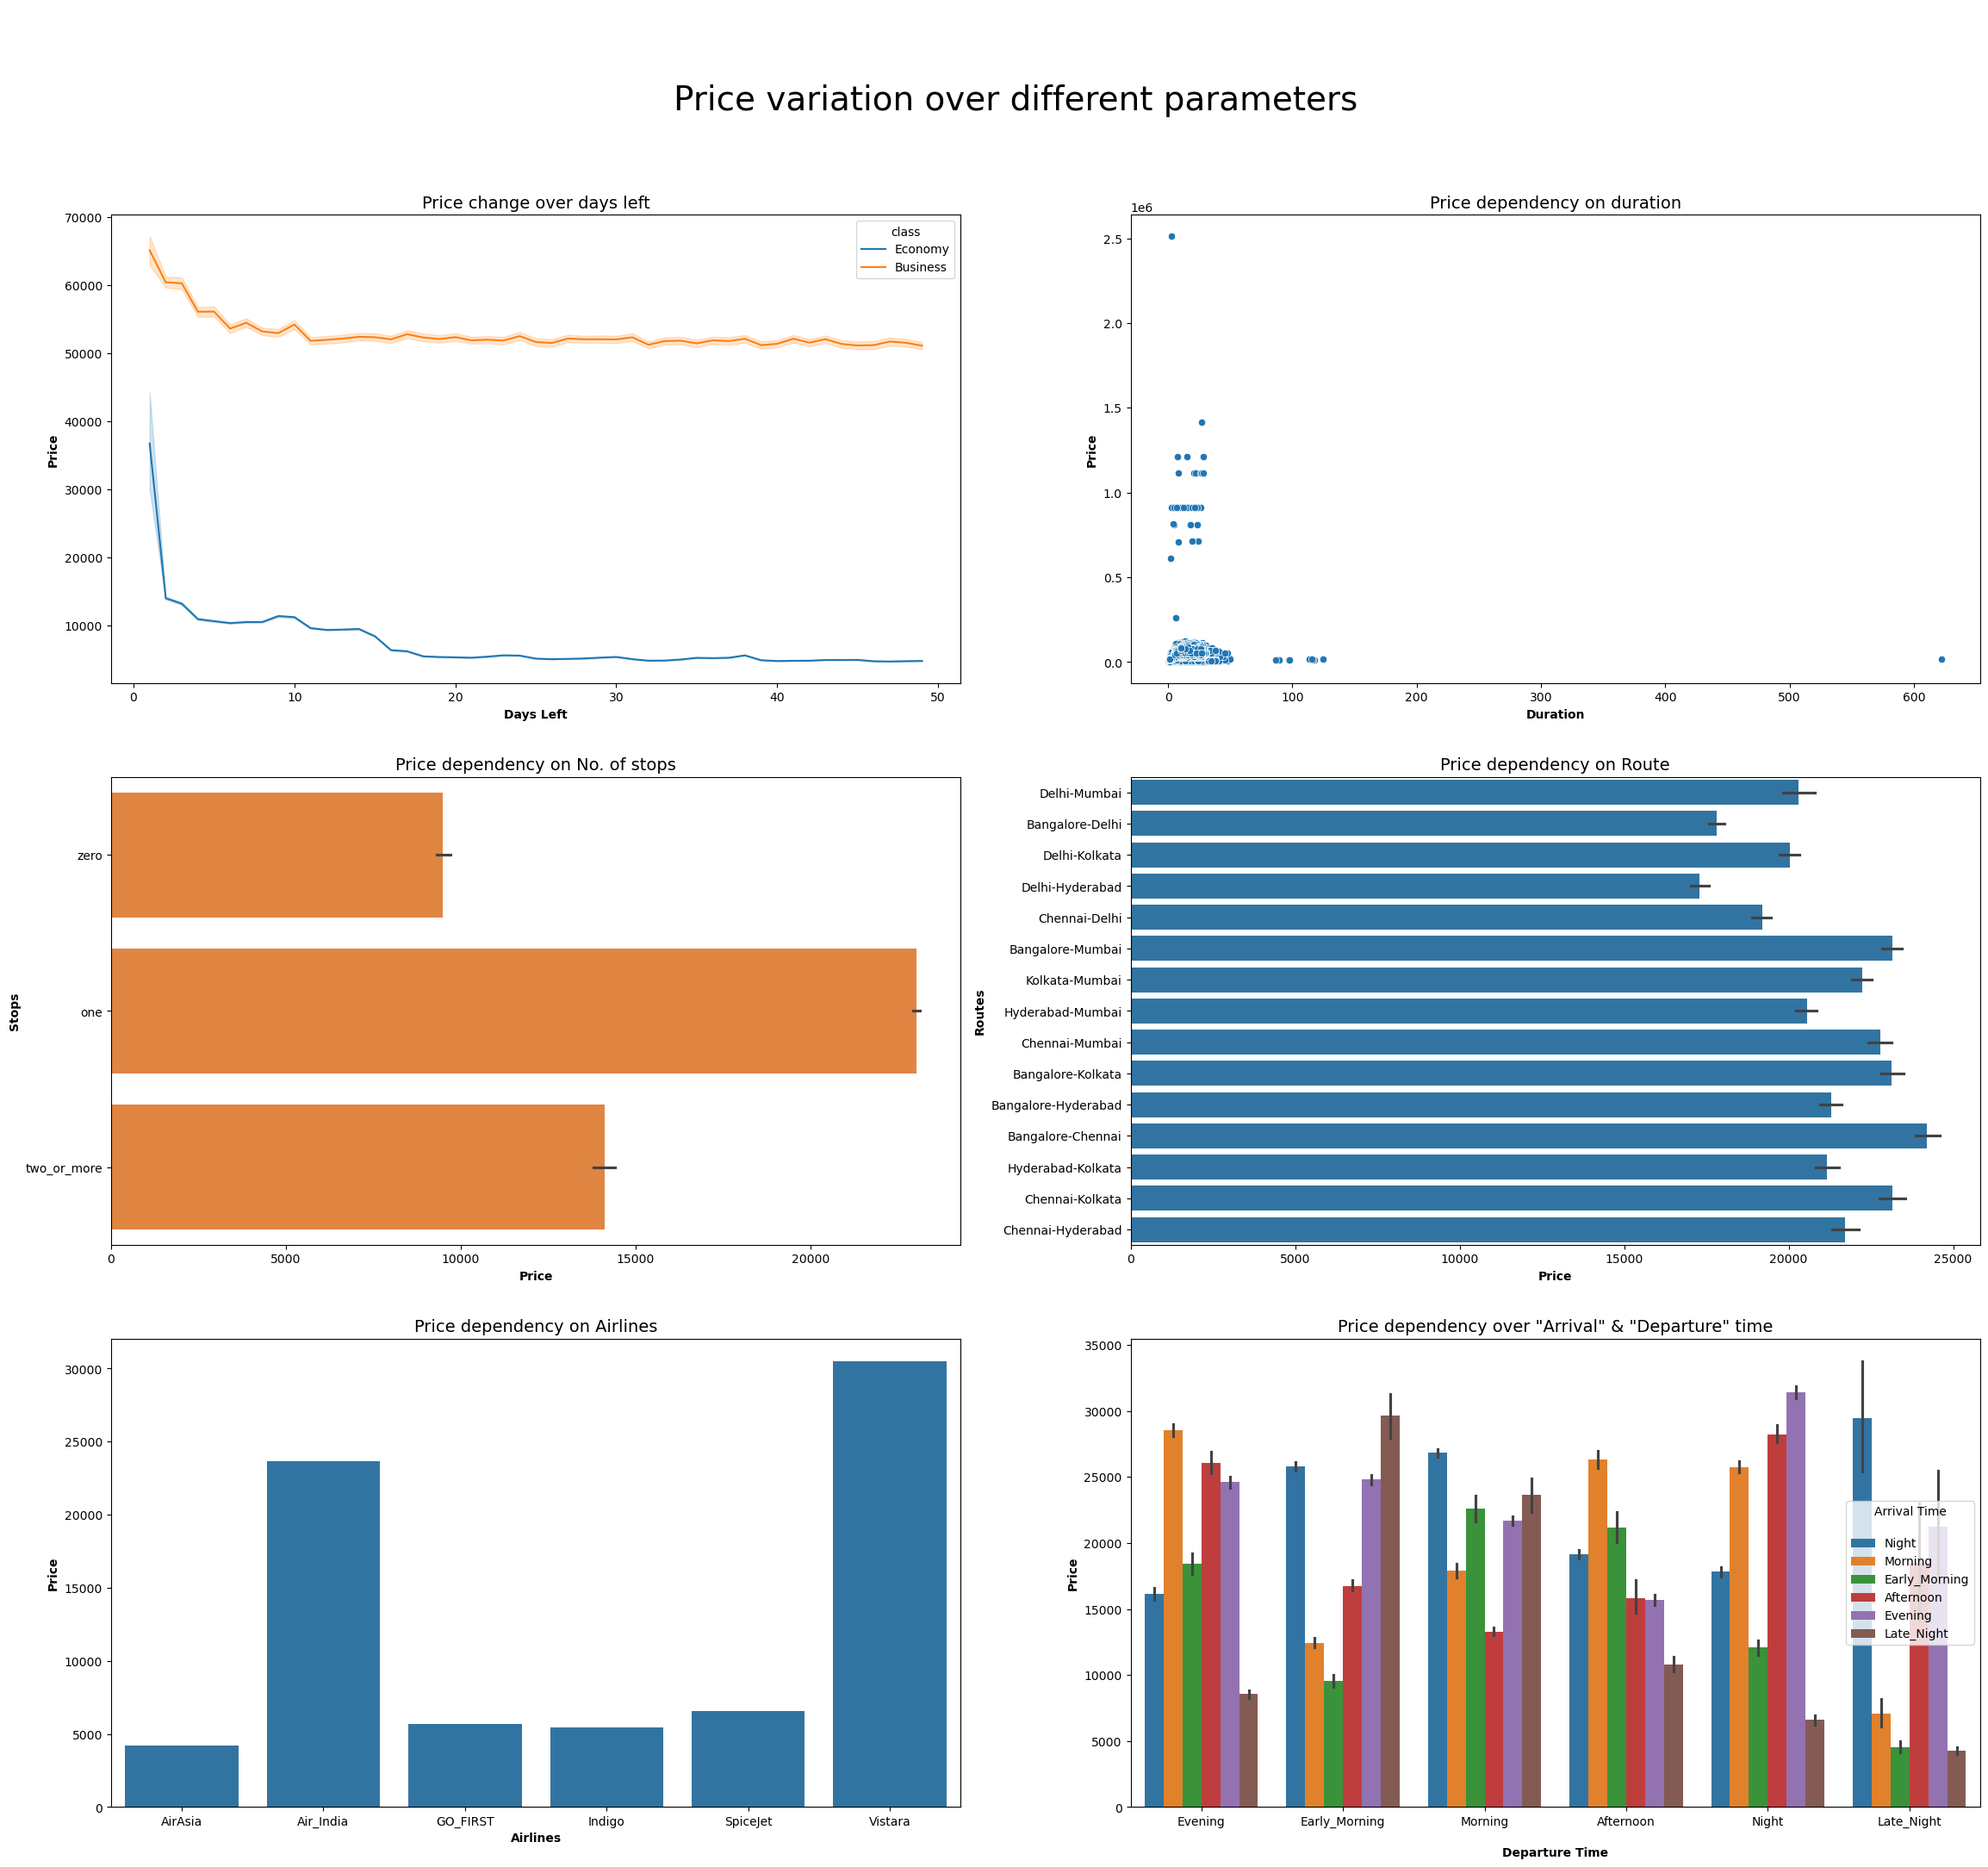

In [26]:
fig, ax = plt.subplots(3,2, figsize = (28,24))

# Price trend over days_left
sns.lineplot(x = df['days_left'], y = df['price'], hue = df['class'], ax = ax[0,0])
ax[0,0].set_title("Price change over days left", fontsize = 14)
ax[0,0].set_ylabel("Price", fontweight = 'bold', fontsize = 10)
ax[0,0].set_xlabel("Days Left", fontweight = 'bold', fontsize = 10)

# Price dependency on duration
sns.scatterplot(x = df['duration'], y = df['price'], ax = ax[0,1])
ax[0,1].set_title("Price dependency on duration", fontsize = 14)
ax[0,1].set_ylabel("Price", fontweight = 'bold', fontsize = 10)
ax[0,1].set_xlabel("Duration", fontweight = 'bold', fontsize = 10)

# Price dependency on No. of stops
sns.barplot(x = df['price'], y = df['stops'], color = '#fa8128', ax = ax[1,0])
ax[1,0].set_title("Price dependency on No. of stops", fontsize = 14)
ax[1,0].set_ylabel("Stops", fontweight = 'bold', fontsize = 10)
ax[1,0].set_xlabel("Price", fontweight = 'bold', fontsize = 10)

# Price dependency on route
sns.barplot(x = df['price'], y = df['route'], ax = ax[1,1])
ax[1,1].set_title("Price dependency on Route", fontsize = 14)
ax[1,1].set_ylabel("Routes", fontweight = 'bold', fontsize = 10)
ax[1,1].set_xlabel("Price", fontweight = 'bold', fontsize = 10)

# Price dependency on Airline
plot_airline = df.groupby('airline')['price'].mean().reset_index()
sns.barplot(x = plot_airline['airline'], y = plot_airline['price'], ax = ax[2,0])
ax[2,0].set_title("Price dependency on Airlines", fontsize = 14)
ax[2,0].set_ylabel("Price", fontweight = 'bold', fontsize = 10)
ax[2,0].set_xlabel("Airlines", fontweight = 'bold', fontsize = 10)

# Price dependency on departure and arrival time
sns.barplot(x = df['departure_time'], y = df['price'], hue = df['arrival_time'], ax = ax[2,1])
ax[2,1].set_title("Price dependency over \"Arrival\" & \"Departure\" time", fontsize = 14)
ax[2,1].set_xlabel("\nDeparture Time", fontweight = 'bold', fontsize = 10)
ax[2,1].set_ylabel("Price", fontweight = 'bold', fontsize = 10)
ax[2,1].legend(title = "Arrival Time\n", loc = 'center right')

fig.suptitle("\n\nPrice variation over different parameters", fontsize = 28)
plt.show()

### Top 5 Popular Airlines

In [28]:
# Finding top 5 airlines based on count
plot_pie = df.groupby('airline')['airline'].count().reset_index(name = 'count').sort_values('count', ascending = False)
print(plot_pie)
# Removing the airline with minimum count
plot_pie = plot_pie[plot_pie['count'] != plot_pie['count'].min()]
plot_pie

     airline   count
5    Vistara  127878
1  Air_India   80907
3     Indigo   43128
2   GO_FIRST   23176
0    AirAsia   16100
4   SpiceJet    9015


,airline,count
5,Vistara,127878
1,Air_India,80907
3,Indigo,43128
2,GO_FIRST,23176
0,AirAsia,16100


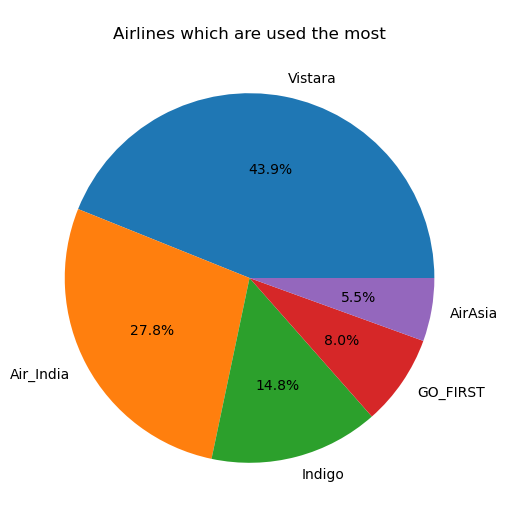

In [33]:
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.pie(plot_pie['count'], labels = plot_pie['airline'], autopct = '%1.1f%%')
plt.title("\nAirlines which are used the most")
plt.show()

### Average Price comparison based on class

In [35]:
plot_class = df.groupby("class")['price'].mean().reset_index(name = 'Avg price').sort_values('Avg price')
plot_class

,class,Avg price
1,Economy,6757.516271
0,Business,52540.081124


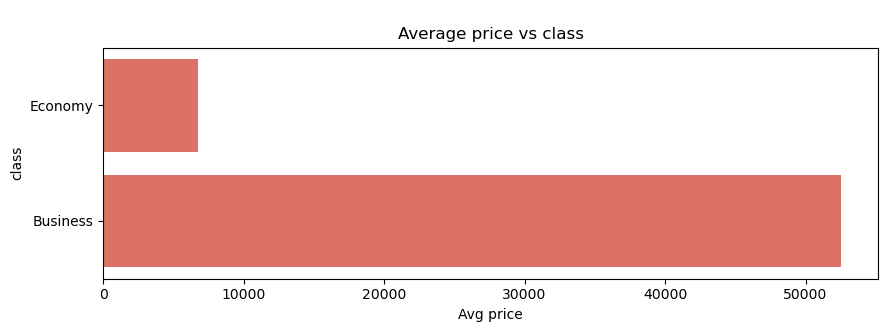

In [39]:
fig, ax = plt.subplots(1,1, figsize = (10,3))
sns.barplot(x = plot_class['Avg price'], y = plot_class['class'], color = '#EF6351')
plt.title("\nAverage price vs class")
plt.show()